<div class="alert alert-info">
<h1><center><font color=darkblue>TÌNH HÌNH SỬ DỤNG DỊCH VỤ CTY PLA CỦA KHÁCH HÀNG THU TRÀ<font></center></h1>


</div>

# <font color=RoyalBlue>1.Xử lý dữ liệu<font>

### Load các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

### Nối các file dữ liệu 
Các file data tin nhắn trao đổi giữa cty và chị Thu Trà được tải về dưới dạng json và được chia thành 3 file. Do đó team DA chúng tôi cần load, xử lý và nối chúng lại thành 1 dataframe duy nhất.

In [2]:
path = "E:\\linh tinh\\project_P&V\\facebook\\messages\\inbox\\thutra_3399860646964337\\tin_nhan\\"

In [3]:
file = "message_1.json"

In [4]:
import json
with open(path+file) as file:
    chat_history = json.load(file)

In [5]:
messages = pd.DataFrame(chat_history['messages'])

In [6]:
messages['content'] = messages['content'].str.encode('latin-1').str.decode('utf-8')
messages['sender_name'] = messages['sender_name'].str.encode('latin-1').str.decode('utf-8')

In [7]:
messages.head()

,sender_name,timestamp_ms,content,reactions,sticker,photos,is_unsent,gifs,videos,share,call_duration,audio_files
0,Thu Trà,1682957822026,đc rồi đó ạ,"[{'reaction': 'ð', 'actor': 'Phan Láº¡c An'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Phan Lạc An,1682957699316,🌝,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Phan Lạc An,1682957697394,để e còn biết ạ :)))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Phan Lạc An,1682957691405,thế có nhắn zalo làm quen tiếp ko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Trà,1682957673883,máy em đần mà,"[{'reaction': 'ð', 'actor': 'Phan Láº¡c An'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for i in range(2,5):
    file = "message_{}.json".format(i)
    with open(path+file) as chat_file:
        chat_history = json.load(chat_file)
    df1 = pd.DataFrame(chat_history['messages'])
    df1['content'] = df1['content'].str.encode('latin-1').str.decode('utf-8')
    df1['sender_name'] = df1['sender_name'].str.encode('latin-1').str.decode('utf-8')
    messages = pd.concat([messages, df1], ignore_index=True)

In [9]:
messages.tail()

,sender_name,timestamp_ms,content,reactions,sticker,photos,is_unsent,gifs,videos,share,call_duration,audio_files,files
39182,Thu Trà,1668849326963,Nhưng mà mất công tìm hiểu rồi thì thôi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39183,Thu Trà,1668849312562,"Giờ đây, các bạn có thể gọi và nhắn tin cho nh...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39184,Thu Trà,1668849312386,Phần nội dung thầy ghi đến 6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39185,Phan Lạc An,1668842734488,Phần này gg ko có tài liệu tiếng việt luôn nên...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39186,Phan Lạc An,1668842621243,"Nhóm trưởng ơi, nhóm trưởng cho em nợ file wor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check kiểu dữ liệu các cột

In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39187 entries, 0 to 39186
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sender_name    39187 non-null  object 
 1   timestamp_ms   39187 non-null  int64  
 2   content        38253 non-null  object 
 3   reactions      5998 non-null   object 
 4   sticker        259 non-null    object 
 5   photos         423 non-null    object 
 6   is_unsent      26 non-null     object 
 7   gifs           87 non-null     object 
 8   videos         98 non-null     object 
 9   share          83 non-null     object 
 10  call_duration  2 non-null      float64
 11  audio_files    38 non-null     object 
 12  files          3 non-null      object 
dtypes: float64(1), int64(1), object(11)
memory usage: 3.9+ MB


### Đưa cột timestamp_ms về đúng định dạng thời gian

In [11]:
messages['timestamp_ms'] = pd.to_datetime(messages['timestamp_ms'], unit="ms")

In [149]:
messages

,sender_name,timestamp_ms,content,reactions,sticker,photos,is_unsent,gifs,videos,share,call_duration,audio_files,files,hour,day_of_week
0,Thu Trà,2023-05-01 16:17:02.026,đc rồi đó ạ,"[{'reaction': 'ð', 'actor': 'Phan Láº¡c An'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday
1,Phan Lạc An,2023-05-01 16:14:59.316,🌝,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday
2,Phan Lạc An,2023-05-01 16:14:57.394,để e còn biết ạ :)))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday
3,Phan Lạc An,2023-05-01 16:14:51.405,thế có nhắn zalo làm quen tiếp ko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday
4,Thu Trà,2023-05-01 16:14:33.883,máy em đần mà,"[{'reaction': 'ð', 'actor': 'Phan Láº¡c An'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39182,Thu Trà,2022-11-19 09:15:26.963,Nhưng mà mất công tìm hiểu rồi thì thôi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,Saturday
39183,Thu Trà,2022-11-19 09:15:12.562,"Giờ đây, các bạn có thể gọi và nhắn tin cho nh...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,Saturday
39184,Thu Trà,2022-11-19 09:15:12.386,Phần nội dung thầy ghi đến 6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,Saturday
39185,Phan Lạc An,2022-11-19 07:25:34.488,Phần này gg ko có tài liệu tiếng việt luôn nên...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Saturday


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39187 entries, 0 to 39186
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sender_name    39187 non-null  object        
 1   timestamp_ms   39187 non-null  datetime64[ns]
 2   content        38253 non-null  object        
 3   reactions      5998 non-null   object        
 4   sticker        259 non-null    object        
 5   photos         423 non-null    object        
 6   is_unsent      26 non-null     object        
 7   gifs           87 non-null     object        
 8   videos         98 non-null     object        
 9   share          83 non-null     object        
 10  call_duration  2 non-null      float64       
 11  audio_files    38 non-null     object        
 12  files          3 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 3.9+ MB


# <font color=RoyalBlue>2. Phân tích và khai phá dữ liệu<font>

### <font color=black>2.1 Phân tích cách dùng từ<font>

In [14]:
PLA_mess = messages.loc[messages['sender_name'] == 'Phan Lạc An']
PLA_mess.head()

,sender_name,timestamp_ms,content,reactions,sticker,photos,is_unsent,gifs,videos,share,call_duration,audio_files,files
1,Phan Lạc An,2023-05-01 16:14:59.316,🌝,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Phan Lạc An,2023-05-01 16:14:57.394,để e còn biết ạ :)))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Phan Lạc An,2023-05-01 16:14:51.405,thế có nhắn zalo làm quen tiếp ko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Phan Lạc An,2023-05-01 16:13:12.147,ơ thế em Bir ko phát hiện ra hả chị :))))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Phan Lạc An,2023-05-01 16:11:11.563,🌝,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


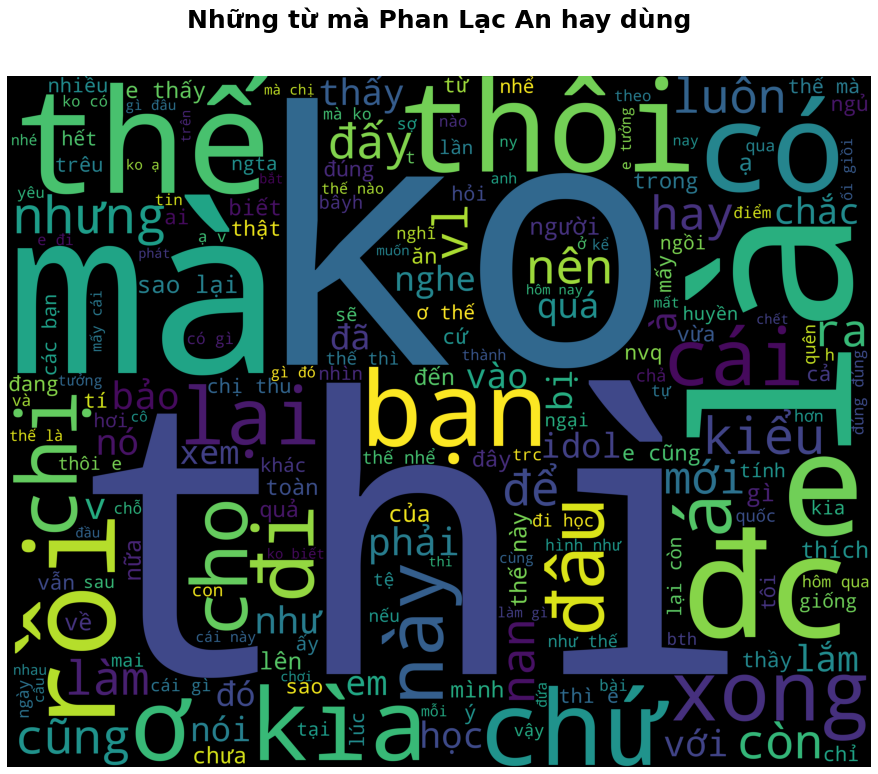

In [51]:
text = ' '.join(str(cat) for cat in PLA_mess.content).lower()
word_cloud = WordCloud(
    width = 5000, height = 4000, 
    background_color ='black', 
    stopwords = STOPWORDS, 
    min_font_size = 10
).generate(text)
plt.figure(figsize = (12, 12)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.suptitle('Những từ mà Phan Lạc An hay dùng', fontweight='bold', size=25)
plt.show() 

In [18]:
VTHT_mess = messages.loc[messages['sender_name'] == 'Thu Trà']
VTHT_mess.head()

,sender_name,timestamp_ms,content,reactions,sticker,photos,is_unsent,gifs,videos,share,call_duration,audio_files,files
0,Thu Trà,2023-05-01 16:17:02.026,đc rồi đó ạ,"[{'reaction': 'ð', 'actor': 'Phan Láº¡c An'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Trà,2023-05-01 16:14:33.883,máy em đần mà,"[{'reaction': 'ð', 'actor': 'Phan Láº¡c An'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Thu Trà,2023-05-01 16:14:30.303,như này ạ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Thu Trà,2023-05-01 16:12:05.824,nó đi lướt top top rồi ạ,"[{'reaction': 'ð', 'actor': 'Phan Láº¡c An'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Thu Trà,2023-05-01 16:11:54.207,Đã bày tỏ cảm xúc 😆 về tin nhắn của bạn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


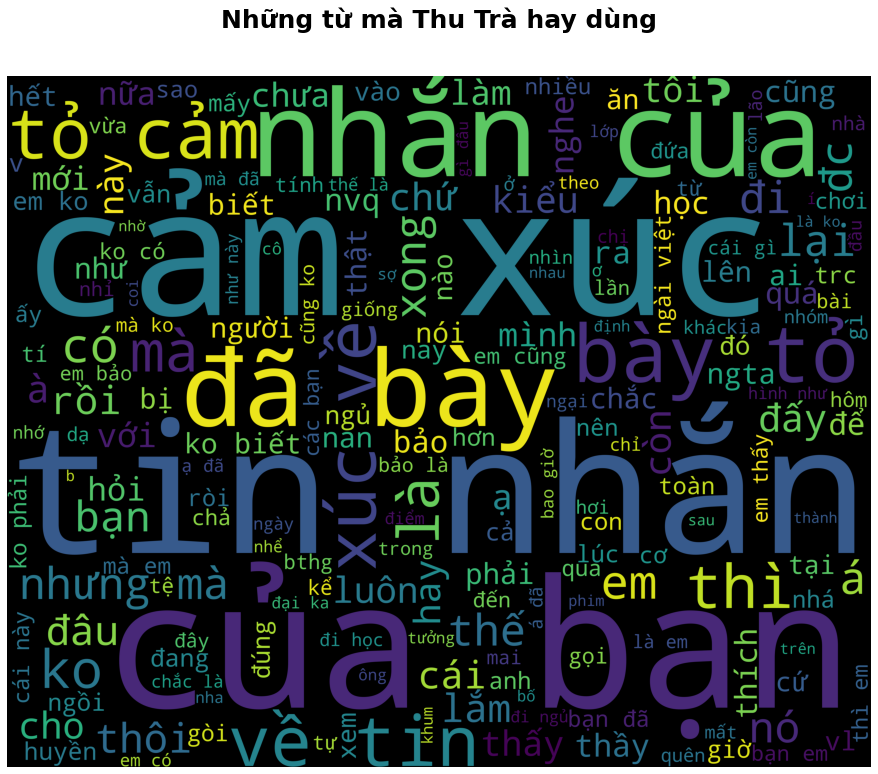

In [52]:
text = ' '.join(str(cat) for cat in VTHT_mess.content).lower()
word_cloud = WordCloud(
    width = 5000, height = 4000, 
    background_color ='black', 
    stopwords = STOPWORDS, 
    min_font_size = 10
).generate(text)
plt.figure(figsize = (12, 12)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.suptitle('Những từ mà Thu Trà hay dùng', fontweight='bold', size=25)
plt.show() 

### Phân tích



- **Về phía quả Phan Lạc An** sử dụng rất nhiều những từ nối câu như "nhưng", "thì", "ko", ... cho thấy rằng quả PLA rất hay văn vở.<br/>
<br/>
- **Về phía quả Thu Trà** sử dụng rất nhiều những từ như "tin nhắn", "của bạn", "cảm xúc", ... cho thấy quả VTHT rất hay kể chuyện về mình nhắn tin với các bạn khác thế nào, và cũng rất hay kể chuyện. Lại còn thấy đc cả chữ "NVQ" =)))) cho thấy cũng khá là cay cú với NVQ nên hay kể chuyện về lão. <br/>
<br/>


### <font color=black>2.2 Số lượng tin nhắn đã gửi<font>

In [24]:
messages['day_of_week'] = messages['timestamp_ms'].dt.day_name()
messages['hour'] = messages['timestamp_ms'].dt.hour
messages.head()

,sender_name,timestamp_ms,content,reactions,sticker,photos,is_unsent,gifs,videos,share,call_duration,audio_files,files,hour,day_of_week
0,Thu Trà,2023-05-01 16:17:02.026,đc rồi đó ạ,"[{'reaction': 'ð', 'actor': 'Phan Láº¡c An'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday
1,Phan Lạc An,2023-05-01 16:14:59.316,🌝,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday
2,Phan Lạc An,2023-05-01 16:14:57.394,để e còn biết ạ :)))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday
3,Phan Lạc An,2023-05-01 16:14:51.405,thế có nhắn zalo làm quen tiếp ko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday
4,Thu Trà,2023-05-01 16:14:33.883,máy em đần mà,"[{'reaction': 'ð', 'actor': 'Phan Láº¡c An'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Monday


In [37]:
summary_by_sender = messages.groupby(['sender_name'], as_index=False).size().rename(columns={'size':'number_of_messages'})

In [38]:
summary_by_sender

,sender_name,number_of_messages
0,Phan Lạc An,18465
1,Thu Trà,20722


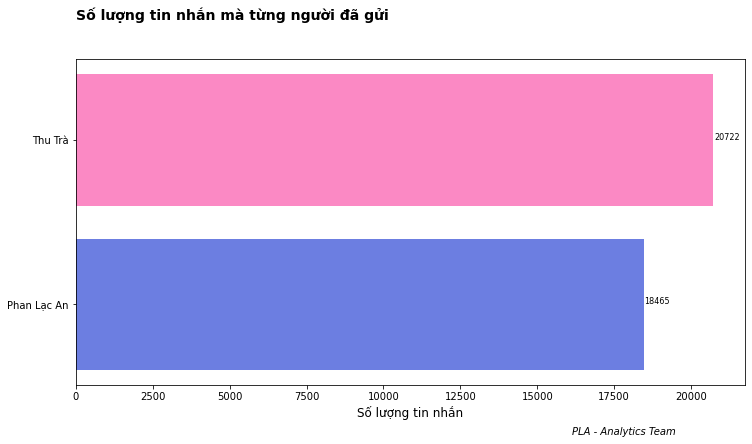

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('sender_name', 'number_of_messages', data=summary_by_sender, color=['#6c7ee1', '#fb89c4'])

i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_sender.number_of_messages[i], xy=(p.get_width()+20, p.get_y()+p.get_height()/2)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t1.set(size=8)
    i+=1
    
plt.suptitle('Số lượng tin nhắn mà từng người đã gửi', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Số lượng tin nhắn', size=12)

plt.text(0.7, 0.01, "PLA - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### Phân tích
- Có thể thấy số lượng tin nhắn của 2 đối tượng chênh lệch ko đáng kể, đâu đó chỉ xấp xỉ 5%. Từ đó cho thấy câu chuyện đc hưởng ứng từ cả 2 bên, ko có ai bắp rang bơ cả.
- Ngoài ra nếu xét khoảng thời gian giữa tin nhắn gần nhất và tin nhắn lâu nhắt, PLA và VTHT đã nhắn với nhau trong 163 ngày. Trung bình mỗi ngày 240 tin nhắn. Cả 2 đối tượng đều có vẻ khá là lắm mồm.

In [76]:
summary_by_day_of_week = messages.groupby(['day_of_week'], as_index=False).size().rename(columns={'size':'number_of_messages'})
summary_by_day_of_week.sort_values('number_of_messages', ascending=True, inplace=True, ignore_index=True)

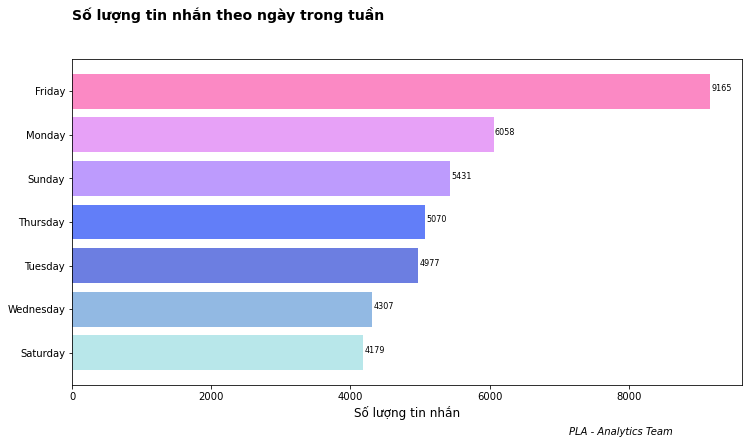

In [86]:
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('day_of_week', 'number_of_messages', data=summary_by_day_of_week, color=['#b8e7ea', '#92b9e3', '#6c7ee1', '#627ef8', '#bd9bfd', '#e7a1f7', '#fb89c4'])

i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_day_of_week.number_of_messages[i], xy=(p.get_width()+20, p.get_y()+p.get_height()/2)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t1.set(size=8)
    i+=1
    
plt.suptitle('Số lượng tin nhắn theo ngày trong tuần', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Số lượng tin nhắn', size=12)

plt.text(0.7, 0.01, "PLA - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### Phân tích
- Có thể thấy số lượng tin nhắn của 2 đối tượng tập trung khá là nhiều ở ngày thứ 6 và ngày thứ 2; còn những ngày trong tuần khác khá là sàn sàn nhau. 
- Có thể giải thích rằng kỳ trc t6 học GTP với PTDHR, học xong 2 môn ấy, đối tượng PLA rất hay khóc nhờ VTHT giải cứu. Còn kỳ này, tuy ko đi học nhưng VTHT lại đi hỏi để hóng hớt trên lớp Kho có sự việc gì ko =)))) 
- Còn thứ 2 thì có thể do đêm CN chat hơi nhiều, lố sang ngày t2.

In [93]:
summary_by_hour = messages.groupby(['hour'], as_index=False).size().rename(columns={'size':'number_of_messages'})
summary_by_hour

,hour,number_of_messages
0,0,337
1,1,498
2,2,660
3,3,784
4,4,795
5,5,1735
6,6,1422
7,7,870
8,8,736
9,9,1051


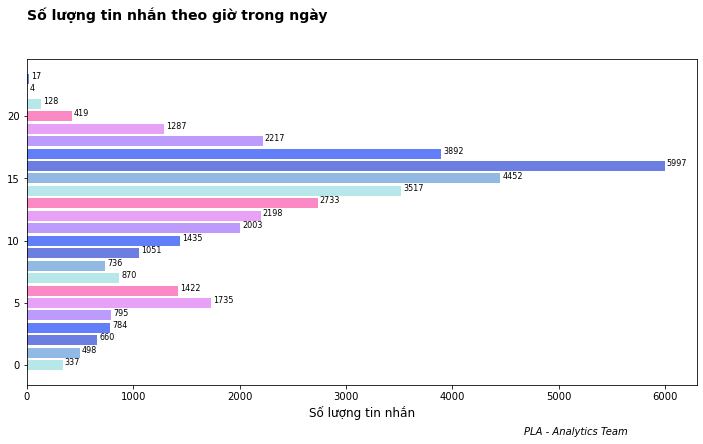

In [96]:
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('hour', 'number_of_messages', data=summary_by_hour, color=['#b8e7ea', '#92b9e3', '#6c7ee1', '#627ef8', '#bd9bfd', '#e7a1f7', '#fb89c4'])

i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_hour.number_of_messages[i], xy=(p.get_width()+20, p.get_y()+p.get_height()/2)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t1.set(size=8)
    i+=1
    
plt.suptitle('Số lượng tin nhắn theo giờ trong ngày', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Số lượng tin nhắn', size=12)

plt.text(0.7, 0.01, "PLA - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### Phân tích
- Có thể thấy đỉnh của đồ thị nằm ở 17h, khá là dễ hiểu vì lúc đố mới tan học, khá là nhiều thứ để 2 đối tượng buôn. Đặc biệt là câu chuyện vừa xảy ra trên lớp, nóng hổi vừa thổi vừa nghe, như chuyện của NVQ =))))
- Ngoài ra còn 1 đỉnh nhỏ khác là lúc 5h. Chắc là 2 đối tượng có mỗi quan hệ gì đó trên tình bạn nên mới nhắn với nhau đến tận 5h. (PS: nhưng quả VTHT lúc đó vẫn ko nhận ra, rất là chán luôn :v)

In [134]:
summary_reactions_by_sender = messages.loc[messages['reactions'].notnull()].groupby(['sender_name'], as_index=False).size().rename(columns={'size':'number_of_reactions'})
summary_sticker_by_sender = messages.loc[messages['sticker'].notnull()].groupby(['sender_name'], as_index=False).size().rename(columns={'size':'number_of_sticker'})
summary_photos_by_sender = messages.loc[messages['photos'].notnull()].groupby(['sender_name'], as_index=False).size().rename(columns={'size':'number_of_photos'})

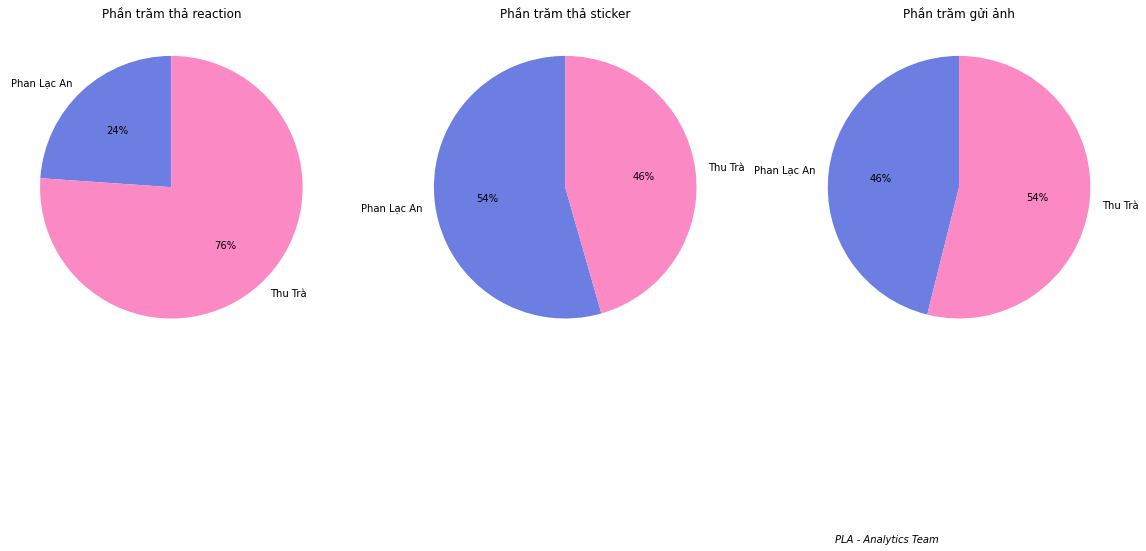

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
ax1, ax2, ax3 = axes

ax1.pie(summary_reactions_by_sender['number_of_reactions'], labels=summary_reactions_by_sender['sender_name'], colors=['#6c7ee1', '#fb89c4'], startangle=90, autopct='%1.0f%%')
ax1.set_title('Phần trăm thả reaction')

ax2.pie(summary_sticker_by_sender['number_of_sticker'], labels=summary_reactions_by_sender['sender_name'], colors=['#6c7ee1', '#fb89c4'], startangle=90, autopct='%1.0f%%')
ax2.set_title('Phần trăm thả sticker')

ax3.pie(summary_photos_by_sender['number_of_photos'], labels=summary_reactions_by_sender['sender_name'], colors=['#6c7ee1', '#fb89c4'], startangle=90, autopct='%1.0f%%')
ax3.set_title('Phần trăm gửi ảnh')

plt.show()

### Phân tích
Phần này công ty mệt rồi (và lười nữa), không phân tích nữa. Khách hàng cũng có nghiệp vụ DA, đề nghị khách hàng tự phân tích.

# <font color=RoyalBlue>3. Kết luận<font>

- Như vậy sau những phân tích xàm xàm ở trên, ta có thể thấy được tình hình sử dụng dịch vụ của chị Thu Trà đối với công ty chúng tôi, công ty trách nhiệm hữu hạng một thành viên PLA, có vẻ đang tương đối là tốt.
<br>
- Do năng lực có hạn nên công ty chỉ phân tích đc thế này thôi. Nếu có gì muốn hỗ trợ bổ sung. Mong quý khách liên hệ FB: Phan Lạc An để giúp cty cải thiện hơn đội ngũ phân tích ạ.
<br>
- Mong quý khách sẽ gắn bó và sử dụng dịch vụ lâu dài của công ty chúng tôi!!!

PS: Yêu bạn <3
<br>
From PLA with love